* 17G01ABT001 HENTON KAGIRI
* 17G01ABT009 EDWIN RAMOGI


# Import libraries 

In [132]:
from textblob import TextBlob

import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from textblob.sentiments import NaiveBayesAnalyzer

# Authentication

In [122]:
consumerKey = "5Z2sT71EcwlqzFczLnh1ZOqez"
consumerSecret = "sDmpaD0ijvcRkqHPUY3yNl9eajOjaVODa1OvNzg1ws8gIZMVX1"
accessToken = "952872572479328258-6XmHVfSYGL3bZfSmO0RciSubb0E7b0f"
accessTokenSecret = "2h6MbVWEHdHqdzoHZ2e6xkjgI2CdxInBjF8ASlKnzB4dy"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


# Sentiment Analysis

In [41]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: NMS Kenya
Please enter how many tweets to analyze: 1300


# Calculate Number of Tweets (Total, Positive, Negative, Neutral)

In [42]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1300
positive number:  425
negative number:  163
neutral number:  712


### Print List

In [43]:
tweet_list

,0
0,@Ma3Route @NMS_Kenya @KURAroads @Sir_Labz @NMS...
1,RT @KURAroads: @Ma3Route @NMS_Kenya @Sir_Labz ...
2,RT @StateHouseKenya: President Uhuru Kenyatta ...
3,@StateHouseKenya @NMS_Kenya Uhuru takes Raila ...
4,RT @StateHouseKenya: President Uhuru Kenyatta ...
...,...
1295,RT @Sir_Labz: @KURAroads @PDUDelivery @JamesMa...
1296,RT @georgewan75: @Sir_Labz @KURAroads @PDUDeli...
1297,RT @johnKamau1: Thank you @NMS_Kenya for honou...
1298,@NMS_Kenya Yesterday I received these messages...


In [297]:
tw_list.shape

(757, 17)

In [298]:
tw_list.describe()

,polarity,subjectivity,neg,neu,pos,compound,text_len,text_word_count,Subjectivity,Polarity
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,0.074261,0.262018,0.055300,0.848978,0.093087,0.072966,71.850727,11.385733,0.262018,0.074261
std,0.287955,0.318599,0.119455,0.183879,0.151642,0.348929,32.586477,6.112630,0.318599,0.287955
min,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.865800,1.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.725000,0.000000,0.000000,43.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.894000,0.000000,0.000000,74.000000,11.000000,0.000000,0.000000
75%,0.136364,0.500000,0.000000,1.000000,0.167000,0.361200,100.000000,16.000000,0.500000,0.136364
max,1.000000,1.000000,0.737000,1.000000,0.804000,0.895700,128.000000,26.000000,1.000000,1.000000


# Plot PieChart

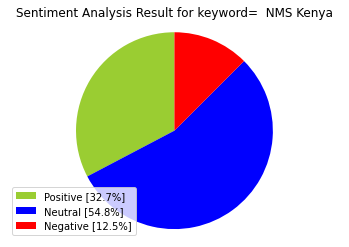

In [44]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [47]:
tweet_list.drop_duplicates(inplace = True)

# Extract Text Values
### text_all = tweet_list[0].values text_neutral = neutral_list[0].values text_positive = positive_list[0].values text_negative = negative_list[0].values

In [48]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,@Ma3Route @NMS_Kenya @KURAroads @Sir_Labz @NMS...,@Ma3Route @NMS_Kenya @KURAroads @Sir_Labz @NMS...
1,RT @KURAroads: @Ma3Route @NMS_Kenya @Sir_Labz ...,RT @KURAroads: @Ma3Route @NMS_Kenya @Sir_Labz ...
2,RT @StateHouseKenya: President Uhuru Kenyatta ...,RT @StateHouseKenya: President Uhuru Kenyatta ...
3,@StateHouseKenya @NMS_Kenya Uhuru takes Raila ...,@StateHouseKenya @NMS_Kenya Uhuru takes Raila ...
7,@StateHouseKenya @NMS_Kenya Ndio tusagau bei y...,@StateHouseKenya @NMS_Kenya Ndio tusagau bei y...
...,...,...
1293,@Sir_Labz @KURAroads @NMS_Kenya @Ma3Route @Ken...,@Sir_Labz @KURAroads @NMS_Kenya @Ma3Route @Ken...
1294,@NMS_Kenya how do we pay for parking in Nairob...,@NMS_Kenya how do we pay for parking in Nairob...
1296,RT @georgewan75: @Sir_Labz @KURAroads @PDUDeli...,RT @georgewan75: @Sir_Labz @KURAroads @PDUDeli...
1298,@NMS_Kenya Yesterday I received these messages...,@NMS_Kenya Yesterday I received these messages...


In [49]:
tweet_list

,0,text
0,@Ma3Route @NMS_Kenya @KURAroads @Sir_Labz @NMS...,@Ma3Route @NMS_Kenya @KURAroads @Sir_Labz @NMS...
1,RT @KURAroads: @Ma3Route @NMS_Kenya @Sir_Labz ...,RT @KURAroads: @Ma3Route @NMS_Kenya @Sir_Labz ...
2,RT @StateHouseKenya: President Uhuru Kenyatta ...,RT @StateHouseKenya: President Uhuru Kenyatta ...
3,@StateHouseKenya @NMS_Kenya Uhuru takes Raila ...,@StateHouseKenya @NMS_Kenya Uhuru takes Raila ...
7,@StateHouseKenya @NMS_Kenya Ndio tusagau bei y...,@StateHouseKenya @NMS_Kenya Ndio tusagau bei y...
...,...,...
1293,@Sir_Labz @KURAroads @NMS_Kenya @Ma3Route @Ken...,@Sir_Labz @KURAroads @NMS_Kenya @Ma3Route @Ken...
1294,@NMS_Kenya how do we pay for parking in Nairob...,@NMS_Kenya how do we pay for parking in Nairob...
1296,RT @georgewan75: @Sir_Labz @KURAroads @PDUDeli...,RT @georgewan75: @Sir_Labz @KURAroads @PDUDeli...
1298,@NMS_Kenya Yesterday I received these messages...,@NMS_Kenya Yesterday I received these messages...


# Cleaning Text (Retweets(RT), Punctuation)

In [50]:
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@Ma3Route @NMS_Kenya @KURAroads @Sir_Labz @NMS...,kenya labz kenya have better roads e...
1,RT @KURAroads: @Ma3Route @NMS_Kenya @Sir_Labz ...,kenya labz our team is finalizing on mo...
2,RT @StateHouseKenya: President Uhuru Kenyatta ...,president uhuru kenyatta has this morning mad...
3,@StateHouseKenya @NMS_Kenya Uhuru takes Raila ...,kenya uhuru takes raila on a tour on fools...
7,@StateHouseKenya @NMS_Kenya Ndio tusagau bei y...,kenya ndio tusagau bei ya mafuta i ataraji...
8,"RT @KenyanTraffic: ""In a quality city, a perso...",in a quality city a person should be able t...
9,@StateHouseKenya @NMS_Kenya He thinks Kenyans ...,kenya he thinks kenyans will eat this usel...
12,@StateHouseKenya @NMS_Kenya Happy fools day Raila,kenya happy fools day raila
13,@StateHouseKenya @NMS_Kenya Finish and retire,kenya finish and retire
14,"If you thought cities can't be transformed, th...",if you thought cities can t be transformed th...


# Calculating Negative, Positive, Neutral and Compound values

In [51]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@Ma3Route @NMS_Kenya @KURAroads @Sir_Labz @NMS...,kenya labz kenya have better roads e...,0.500000,0.500000,positive,0.000,0.734,0.266,0.4404
1,RT @KURAroads: @Ma3Route @NMS_Kenya @Sir_Labz ...,kenya labz our team is finalizing on mo...,0.285714,0.535714,neutral,0.000,1.000,0.000,0.0000
2,RT @StateHouseKenya: President Uhuru Kenyatta ...,president uhuru kenyatta has this morning mad...,-0.200000,0.300000,neutral,0.000,1.000,0.000,0.0000
3,@StateHouseKenya @NMS_Kenya Uhuru takes Raila ...,kenya uhuru takes raila on a tour on fools...,0.000000,0.000000,negative,0.286,0.714,0.000,-0.4939
7,@StateHouseKenya @NMS_Kenya Ndio tusagau bei y...,kenya ndio tusagau bei ya mafuta i ataraji...,0.000000,0.000000,negative,0.109,0.891,0.000,-0.2960
8,"RT @KenyanTraffic: ""In a quality city, a perso...",in a quality city a person should be able t...,0.212121,0.583333,positive,0.000,0.882,0.118,0.3724
9,@StateHouseKenya @NMS_Kenya He thinks Kenyans ...,kenya he thinks kenyans will eat this usel...,-0.500000,0.250000,negative,0.421,0.579,0.000,-0.7615
12,@StateHouseKenya @NMS_Kenya Happy fools day Raila,kenya happy fools day raila,0.800000,1.000000,positive,0.323,0.303,0.374,0.1280
13,@StateHouseKenya @NMS_Kenya Finish and retire,kenya finish and retire,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
14,"If you thought cities can't be transformed, th...",if you thought cities can t be transformed th...,0.333333,0.666667,positive,0.000,0.700,0.300,0.7184


# Creating new data frames for all sentiments (positive, negative and neutral)

In [52]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]


# count_values_in single columns

In [53]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

# count_values for sentiment

In [54]:
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,372,49.14
positive,241,31.84
negative,144,19.02


# Plot PieChart

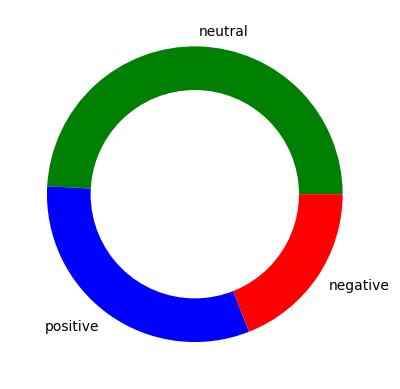

In [55]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Create WordCloud Function

In [60]:
from google.colab import files 
uploaded  = files.upload()

Saving cloud.png to cloud.png


In [299]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(width=600, 
                   height=400,
                   background_color="black",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

# wordcloud for all tweets

Word Cloud Saved Successfully


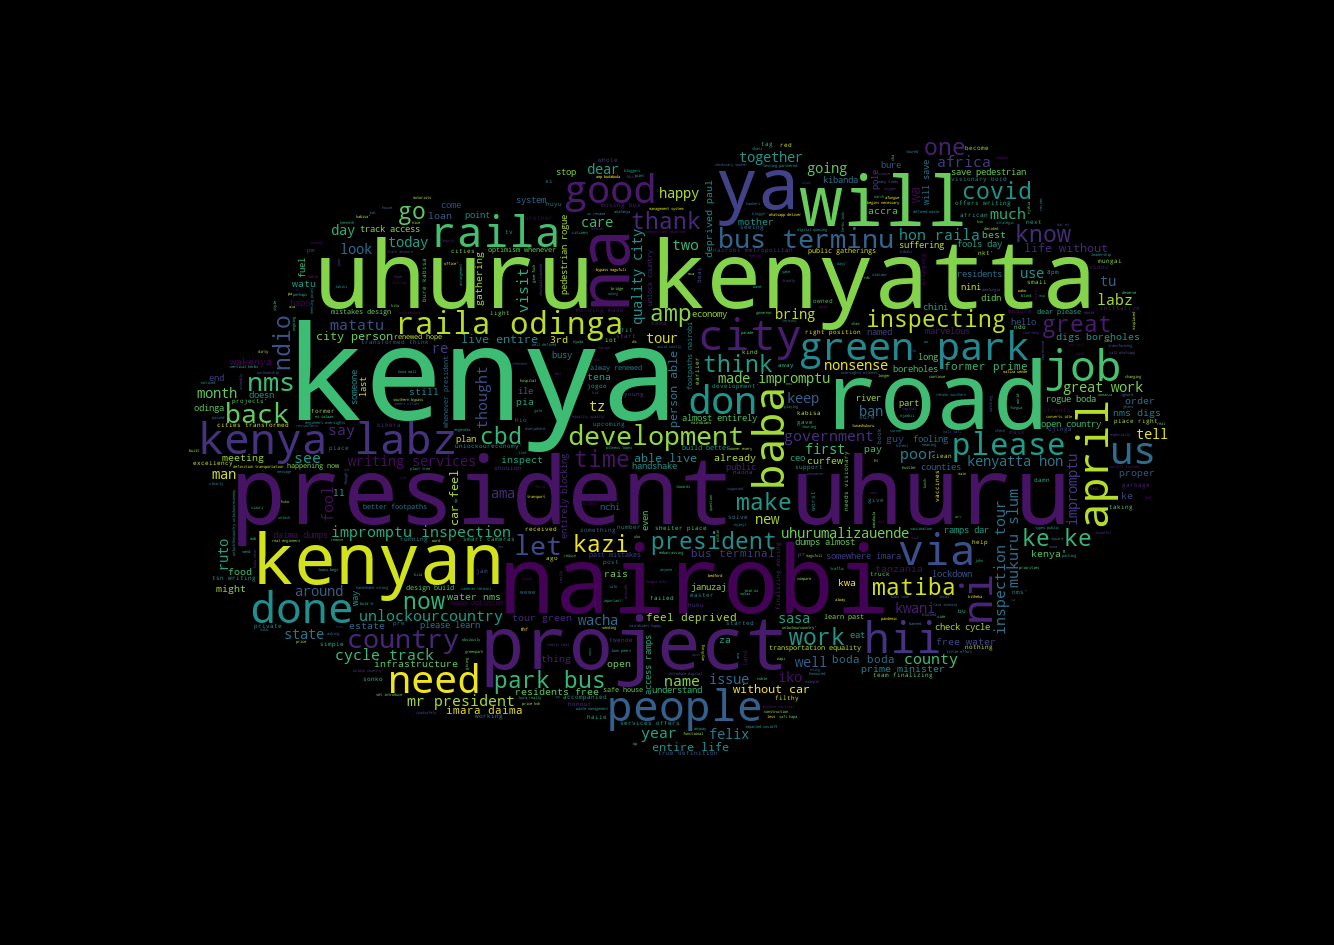

In [300]:
create_wordcloud(tw_list["text"].values)

# wordcloud for positive sentiment

Word Cloud Saved Successfully


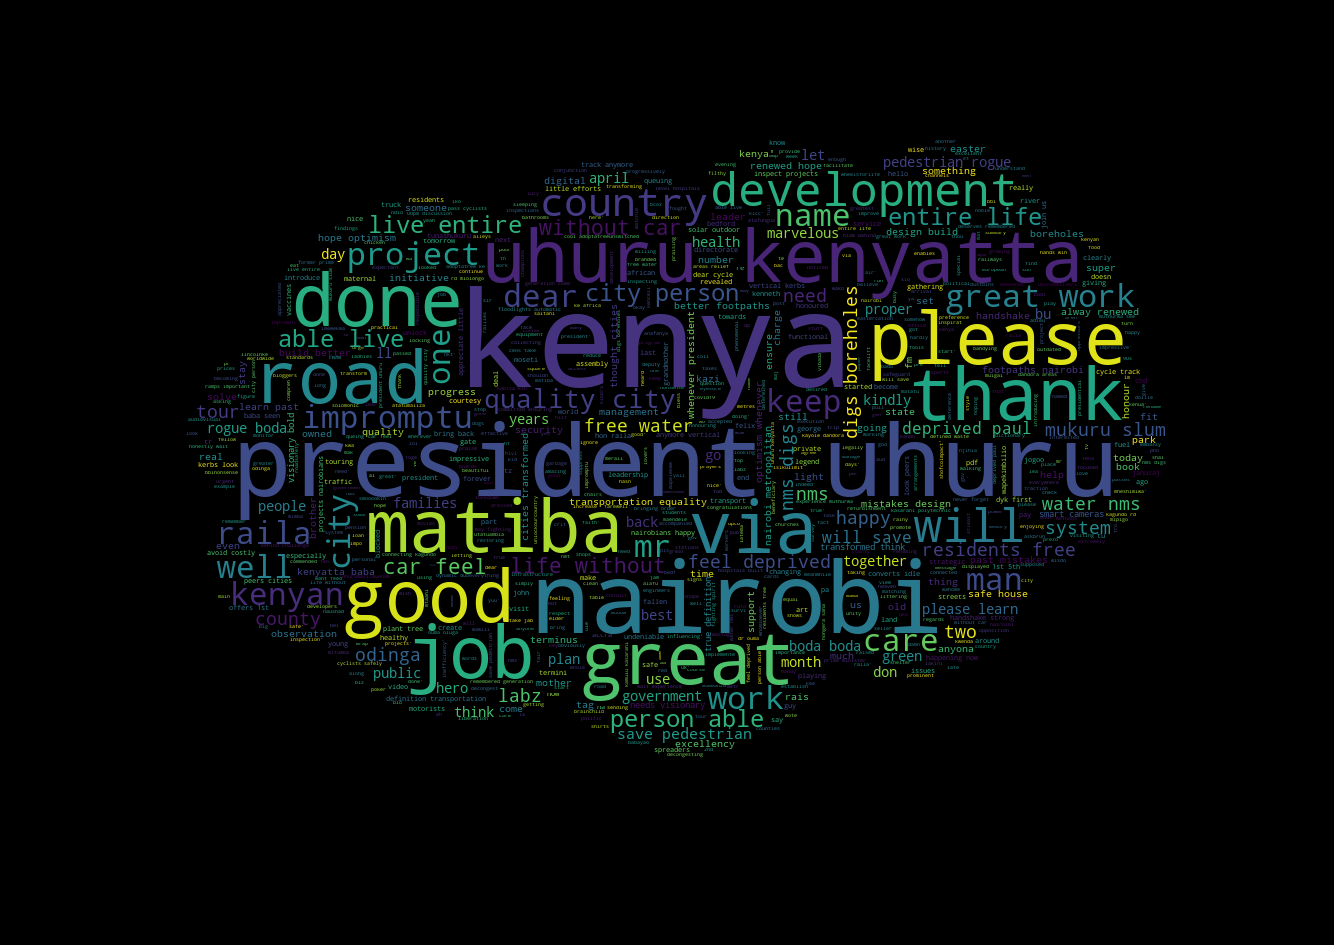

In [301]:
create_wordcloud(tw_list_positive["text"].values)



# wordcloud for negative sentiment

Word Cloud Saved Successfully


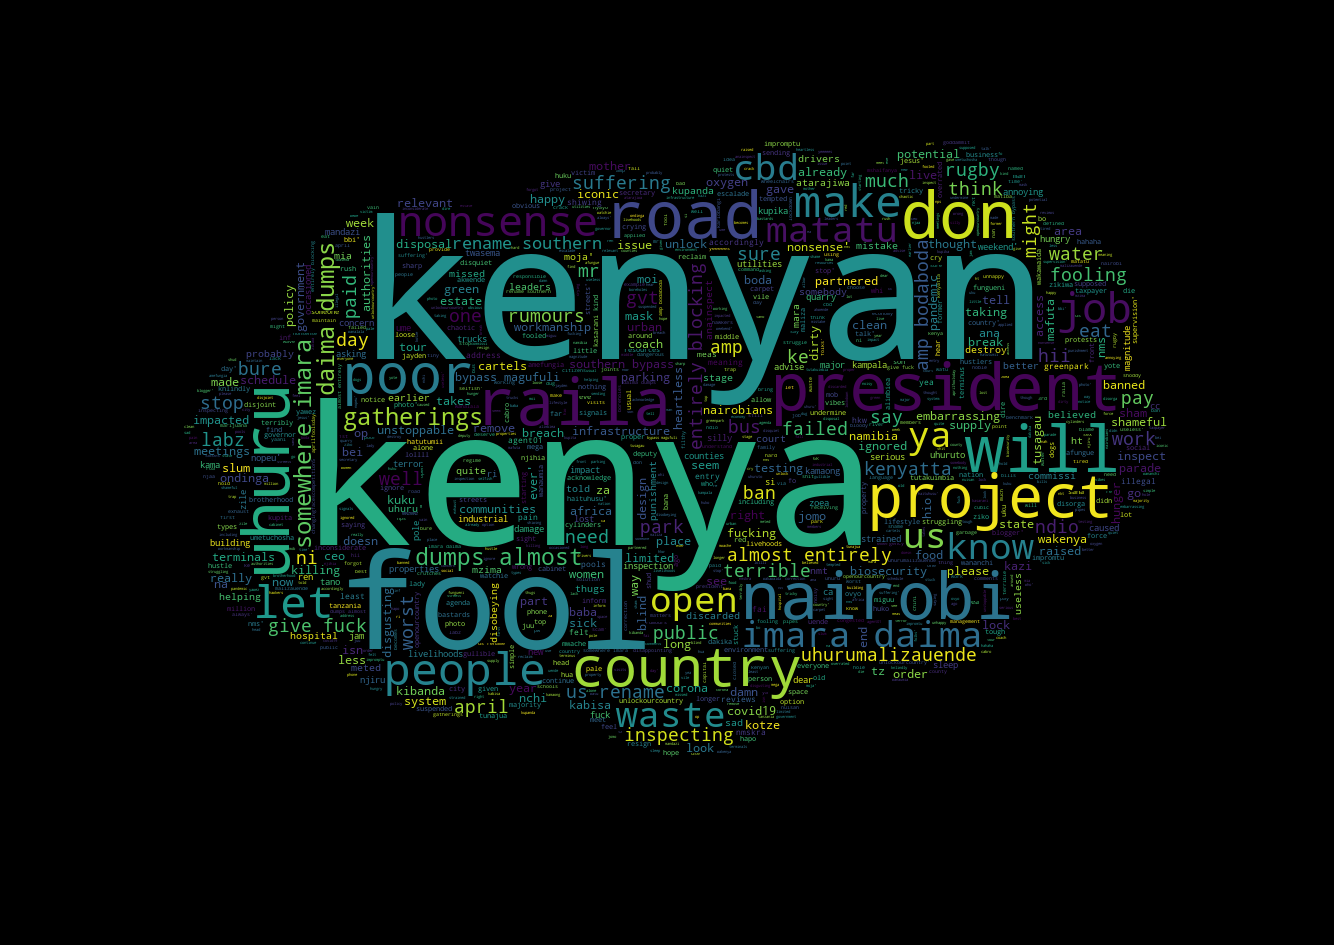

In [302]:
create_wordcloud(tw_list_negative["text"].values)

# wordcloud for neutral sentiment

Word Cloud Saved Successfully


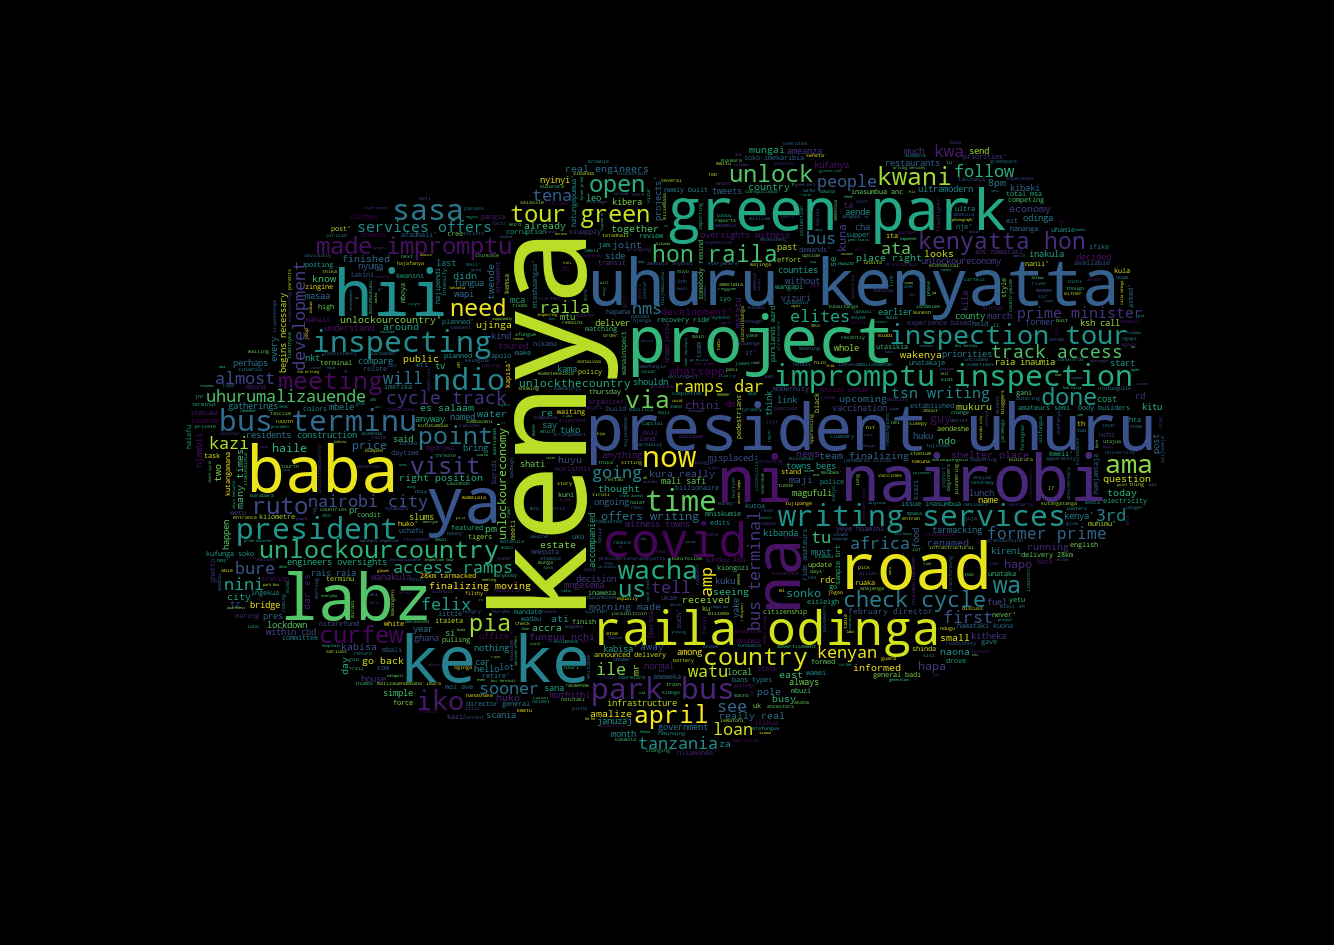

In [303]:
create_wordcloud(tw_list_neutral["text"].values)

# Calculate tweet's length and word count

In [65]:
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [66]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,81.33
neutral,60.98
positive,82.97


In [67]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,13.48
neutral,9.15
positive,13.59


# Remove Punctuation Function

In [68]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

Tokenize

In [69]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

# Remove stopwords

In [73]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

# Apply stemmers

In [74]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

# Clean Text 

In [75]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [176]:
tw_list.head(20)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed,Subjectivity,Polarity
0,@Ma3Route @NMS_Kenya @KURAroads @Sir_Labz @NMS...,kenya labz kenya have better roads e...,0.500000,0.500000,positive,0.000,0.734,0.266,0.4404,73,10,kenya labz kenya have better roads e...,"[, kenya, labz, kenya, have, better, roads, en...","[, kenya, labz, kenya, better, roads, engineer...","[, kenya, labz, kenya, better, road, engin, w, ]",0.500000,0.500000
1,RT @KURAroads: @Ma3Route @NMS_Kenya @Sir_Labz ...,kenya labz our team is finalizing on mo...,0.285714,0.535714,neutral,0.000,1.000,0.000,0.0000,112,20,kenya labz our team is finalizing on mo...,"[, kenya, labz, our, team, is, finalizing, on,...","[, kenya, labz, team, finalizing, moving, bus,...","[, kenya, labz, team, final, move, bu, shelter...",0.535714,0.285714
2,RT @StateHouseKenya: President Uhuru Kenyatta ...,president uhuru kenyatta has this morning mad...,-0.200000,0.300000,neutral,0.000,1.000,0.000,0.0000,120,20,president uhuru kenyatta has this morning mad...,"[, president, uhuru, kenyatta, has, this, morn...","[, president, uhuru, kenyatta, morning, made, ...","[, presid, uhuru, kenyatta, morn, made, improm...",0.300000,-0.200000
3,@StateHouseKenya @NMS_Kenya Uhuru takes Raila ...,kenya uhuru takes raila on a tour on fools...,0.000000,0.000000,negative,0.286,0.714,0.000,-0.4939,51,10,kenya uhuru takes raila on a tour on fools...,"[, kenya, uhuru, takes, raila, on, a, tour, on...","[, kenya, uhuru, takes, raila, tour, fools, da...","[, kenya, uhuru, take, raila, tour, fool, day, ]",0.000000,0.000000
7,@StateHouseKenya @NMS_Kenya Ndio tusagau bei y...,kenya ndio tusagau bei ya mafuta i ataraji...,0.000000,0.000000,negative,0.109,0.891,0.000,-0.2960,122,20,kenya ndio tusagau bei ya mafuta i ataraji...,"[, kenya, ndio, tusagau, bei, ya, mafuta, i, a...","[, kenya, ndio, tusagau, bei, ya, mafuta, atar...","[, kenya, ndio, tusagau, bei, ya, mafuta, atar...",0.000000,0.000000
8,"RT @KenyanTraffic: ""In a quality city, a perso...",in a quality city a person should be able t...,0.212121,0.583333,positive,0.000,0.882,0.118,0.3724,122,23,in a quality city a person should be able t...,"[, in, a, quality, city, a, person, should, be...","[, quality, city, person, able, live, entire, ...","[, qualiti, citi, person, abl, live, entir, li...",0.583333,0.212121
9,@StateHouseKenya @NMS_Kenya He thinks Kenyans ...,kenya he thinks kenyans will eat this usel...,-0.500000,0.250000,negative,0.421,0.579,0.000,-0.7615,78,11,kenya he thinks kenyans will eat this usel...,"[, kenya, he, thinks, kenyans, will, eat, this...","[, kenya, thinks, kenyans, eat, useless, proje...","[, kenya, think, kenyan, eat, useless, project...",0.250000,-0.500000
12,@StateHouseKenya @NMS_Kenya Happy fools day Raila,kenya happy fools day raila,0.800000,1.000000,positive,0.323,0.303,0.374,0.1280,31,5,kenya happy fools day raila,"[, kenya, happy, fools, day, raila]","[, kenya, happy, fools, day, raila]","[, kenya, happi, fool, day, raila]",1.000000,0.800000
13,@StateHouseKenya @NMS_Kenya Finish and retire,kenya finish and retire,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,27,4,kenya finish and retire,"[, kenya, finish, and, retire]","[, kenya, finish, retire]","[, kenya, finish, retir]",0.000000,0.000000
14,"If you thought cities can't be transformed, th...",if you thought cities can t be transformed th...,0.333333,0.666667,positive,0.000,0.700,0.300,0.7184,106,17,if you thought cities can t be transformed th...,"[if, you, thought, cities, can, t, be, transfo...","[thought, cities, transformed, think, kenya, n...","[thought, citi, transform, think, kenya, nairo...",0.666667,0.333333


# Apply Countvectorizer

In [77]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
print(countVectorizer.get_feature_names())

757 Number of reviews has 1734 words
['', 'aa', 'ab', 'abl', 'accept', 'access', 'accompani', 'accordingli', 'accra', 'acknowledg', 'across', 'actual', 'address', 'adieu', 'adoptatre', 'advertis', 'advis', 'aend', 'aendesh', 'afadhali', 'africa', 'african', 'afungu', 'agenc', 'agenda', 'agent', 'ago', 'agre', 'air', 'akaenda', 'akapea', 'akiinspect', 'akona', 'akwend', 'al', 'alaf', 'alafu', 'alifungua', 'alijuaej', 'alimbiea', 'alipiga', 'alivaa', 'alley', 'alli', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'alway', 'ama', 'amal', 'amalizeaend', 'amateur', 'amaz', 'ame', 'ameanza', 'amefungia', 'amekosa', 'amekua', 'amekuja', 'amekula', 'amerudia', 'ameweka', 'among', 'amp', 'ana', 'anafanya', 'anainspect', 'anajenga', 'anajua', 'anc', 'ancestor', 'anniversari', 'announc', 'annoy', 'anoth', 'anybodi', 'anymor', 'anyon', 'anyona', 'anyth', 'anyway', 'anza', 'apa', 'apo', 'apolo', 'appar', 'appli', 'appreci', 'april', 'aprilfoolsday', 'ar', 'area', 'around', 'arrang', 'arriv'

In [78]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aa,ab,abl,accept,access,accompani,accordingli,accra,acknowledg,across,actual,address,adieu,adoptatre,advertis,advis,aend,aendesh,afadhali,africa,african,afungu,agenc,agenda,agent,ago,agre,air,akaenda,akapea,akiinspect,akona,akwend,al,alaf,alafu,alifungua,alijuaej,alimbiea,...,workmanship,world,worldwid,worst,wote,would,wow,wrap,write,wrong,ya,yaani,yake,yall,yawez,ye,yea,yeah,year,yeeeee,yeny,yesterday,yet,yetu,yey,yoghurt,yote,young,yuu,za,zabloan,zako,zikiwa,ziko,zile,zimeanza,zinamtoa,zingin,zoea,zone
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Print Most Used Words

In [79]:
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
kenya,733
uhuru,74
presid,71
nairobi,50
kenyatta,49
road,38
raila,36
citi,35
inspect,34
bu,34


## ngram function 

In [80]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### n2_bigram

In [81]:
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('president uhuru', 47),
 ('uhuru kenyatta', 45),
 ('kenya kenya', 40),
 ('kenya labz', 16),
 ('green park', 14),
 ('raila odinga', 13),
 ('kenya nairobi', 12),
 ('labz kenya', 11),
 ('bus terminus', 11),
 ('kenya great', 11),
 ('impromptu inspection', 10),
 ('park bus', 10),
 ('mr president', 10),
 ('kenya let', 9),
 ('ke ke', 9),
 ('inspection tour', 8),
 ('hon raila', 8),
 ('cycle track', 8),
 ('writing services', 8),
 ('great work', 7)]

### n3_trigram

In [82]:
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('president uhuru kenyatta', 41),
 ('green park bus', 10),
 ('kenya great work', 7),
 ('uhuru kenyatta hon', 7),
 ('park bus terminus', 6),
 ('quality city person', 6),
 ('city person able', 6),
 ('person able live', 6),
 ('able live entire', 6),
 ('live entire life', 6),
 ('entire life car', 6),
 ('life car feel', 6),
 ('car feel deprived', 6),
 ('kenya imara daima', 6),
 ('kenyatta hon raila', 6),
 ('hon raila odinga', 6),
 ('residents free water', 6),
 ('free water nms', 6),
 ('water nms digs', 6),
 ('nms digs boreholes', 6)]

## Logistic Regression Model

In [271]:
# Split the data into Training and Testing Set
from sklearn.model_selection import train_test_split
reviews = tw_list['text'].values
labels = tw_list['sentiment'].values
reviews_train, reviews_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state = 2)

In [280]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

vectorizer.fit(reviews_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function spacy_tokenizer at 0x7f295123d5f0>,
                vocabulary=None)

In [281]:
X_train = vectorizer.transform(reviews_train)
X_test = vectorizer.transform(reviews_test)

## Train the Model

In [282]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluate the Model

In [296]:
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", str (accuracy*100)+' '+'%') 

Accuracy: 76.31578947368422 %


Predictions on New Data 

In [264]:
new_reviews = ['Poor kenya roads', 'Very good effort', '  somewhere in imara daima about 3 of these dumps almost entirely blocking the road']
X_new = vectorizer.transform(new_reviews)
classifier.predict(X_new)

array(['neutral', 'positive', 'negative'], dtype=object)

vectorize the data 

In [284]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 2,
                             max_df = 0.8,
                             sublinear_tf = True, #inverse document reweighting
                             use_idf = True)
train_vectors = vectorizer.fit_transform(tw_list['text'])
test_vectors = vectorizer.transform(tw_list['text'])

# Create Linear SVM Model

In [285]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, tw_list['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(tw_list['sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['positive'])
print('negative: ', report['negative'])
print('neutral: ', report['neutral'])

Training time: 0.057455s; Prediction time: 0.038329s
positive:  {'precision': 0.9414225941422594, 'recall': 0.9336099585062241, 'f1-score': 0.9375, 'support': 241}
negative:  {'precision': 0.967741935483871, 'recall': 0.8333333333333334, 'f1-score': 0.8955223880597015, 'support': 144}
neutral:  {'precision': 0.9263959390862944, 'recall': 0.9811827956989247, 'f1-score': 0.9530026109660574, 'support': 372}


Test SVM classifier

In [286]:
review = """very good effort"""

review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

['positive']


In [287]:
review = """Hahaha @ItsMJ254 do you get stuck in traffic? Ama ni propaganda? Next we'll hear you complaining about blackouts"""

review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

['neutral']


In [288]:
review = """Total dandora is the worst I have visited. No washroom for ladies some guy went home with the key. """

review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))


['negative']
